In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

--- STEP 1: LOAD AND PREPROCESS DATA ---

In [4]:
print("--- Step 1: Loading and Preprocessing Data ---")
dataset = pd.read_csv('Extracted-dataset.csv')
print("Original Dataset Shape:", dataset.shape)
dataset.head()

--- Step 1: Loading and Preprocessing Data ---
Original Dataset Shape: (121575, 24)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2009-01-01,NorfolkIsland,20.4,25.8,0.0,6.0,12.4,NNW,31.0,NNW,...,71.0,1014.5,1013.6,3.0,1.0,23.3,24.7,No,0.2,No
1,2009-01-02,NorfolkIsland,20.9,26.7,0.2,8.0,10.3,N,31.0,NNE,...,77.0,1016.3,1015.5,2.0,5.0,25.0,25.1,No,0.0,No
2,2009-01-03,NorfolkIsland,22.3,26.3,0.0,3.2,2.0,E,35.0,ENE,...,90.0,1014.6,1014.3,7.0,7.0,24.7,23.8,No,1.2,Yes
3,2009-01-04,NorfolkIsland,21.6,22.2,1.2,2.8,0.0,ESE,41.0,ESE,...,95.0,1016.0,1015.3,8.0,8.0,22.1,21.2,Yes,2.6,Yes
4,2009-01-05,NorfolkIsland,20.4,23.5,2.6,2.2,2.9,ESE,52.0,ESE,...,86.0,1015.3,1013.7,7.0,7.0,21.8,21.6,Yes,0.0,No


In [5]:
# --- STEP 1: Encode binary target/label columns ---
dataset['RainToday'] = dataset['RainToday'].map({'No': 0, 'Yes': 1})
dataset['RainTomorrow'] = dataset['RainTomorrow'].map({'No': 0, 'Yes': 1})
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2009-01-01,NorfolkIsland,20.4,25.8,0.0,6.0,12.4,NNW,31.0,NNW,...,71.0,1014.5,1013.6,3.0,1.0,23.3,24.7,0.0,0.2,0
1,2009-01-02,NorfolkIsland,20.9,26.7,0.2,8.0,10.3,N,31.0,NNE,...,77.0,1016.3,1015.5,2.0,5.0,25.0,25.1,0.0,0.0,0
2,2009-01-03,NorfolkIsland,22.3,26.3,0.0,3.2,2.0,E,35.0,ENE,...,90.0,1014.6,1014.3,7.0,7.0,24.7,23.8,0.0,1.2,1
3,2009-01-04,NorfolkIsland,21.6,22.2,1.2,2.8,0.0,ESE,41.0,ESE,...,95.0,1016.0,1015.3,8.0,8.0,22.1,21.2,1.0,2.6,1
4,2009-01-05,NorfolkIsland,20.4,23.5,2.6,2.2,2.9,ESE,52.0,ESE,...,86.0,1015.3,1013.7,7.0,7.0,21.8,21.6,1.0,0.0,0


In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer

# Check for fully missing columns
fully_missing_cols = dataset.columns[dataset.isnull().all()]
print("Columns with all missing values:", fully_missing_cols.tolist())

# --- STEP 2: Handle Missing Values ---
print("--- Step 2: Handling Missing Values ---")

# Step 2.1: Impute object/categorical columns with mode
categorical_cols = dataset.select_dtypes(include=['object']).columns
for col in categorical_cols:
    mode_value = dataset[col].mode()[0]
    print(f"Imputing missing values in column '{col}' with mode value: '{mode_value}'")
    dataset[col] = dataset[col].fillna


# Step 2.2: Label Encode categorical columns
print("Label encoding categorical columns...")
lencoders = {}
for col in categorical_cols:
    lencoders[col] = LabelEncoder()
    dataset[col] = lencoders[col].fit_transform(dataset[col])

# Step 2.3: Impute numerical columns using Iterative Imputer (MICE)
print("Running MICE imputation on numerical features...")
mice_imputer = IterativeImputer(random_state=42)
dataset_imputed_array = mice_imputer.fit_transform(dataset)

# Ensure shape matches before converting to DataFrame
if dataset_imputed_array.shape[1] != dataset.shape[1]:
    print("Warning: Imputed array shape does not match original dataset. Fixing...")
    dataset = dataset.iloc[:, :dataset_imputed_array.shape[1]]

dataset_imputed = pd.DataFrame(dataset_imputed_array, columns=dataset.columns)

# Final check
print("Shape after imputation:", dataset_imputed.shape)
dataset_imputed.head(6)


Columns with all missing values: []
--- Step 2: Handling Missing Values ---
Imputing missing values in column 'Date' with mode value: '2013-03-02'
Imputing missing values in column 'Location' with mode value: 'Canberra'
Imputing missing values in column 'WindGustDir' with mode value: 'W'
Imputing missing values in column 'WindDir9am' with mode value: 'N'
Imputing missing values in column 'WindDir3pm' with mode value: 'W'
Label encoding categorical columns...
Running MICE imputation on numerical features...
Shape after imputation: (121575, 24)


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,0.0,0.0,20.4,25.8,0.0,6.0,12.4,0.0,31.0,0.0,...,71.0,1014.5,1013.6,3.0,1.0,23.3,24.7,0.0,0.2,0.0
1,0.0,0.0,20.9,26.7,0.2,8.0,10.3,0.0,31.0,0.0,...,77.0,1016.3,1015.5,2.0,5.0,25.0,25.1,0.0,0.0,0.0
2,0.0,0.0,22.3,26.3,0.0,3.2,2.0,0.0,35.0,0.0,...,90.0,1014.6,1014.3,7.0,7.0,24.7,23.8,0.0,1.2,1.0
3,0.0,0.0,21.6,22.2,1.2,2.8,0.0,0.0,41.0,0.0,...,95.0,1016.0,1015.3,8.0,8.0,22.1,21.2,1.0,2.6,1.0
4,0.0,0.0,20.4,23.5,2.6,2.2,2.9,0.0,52.0,0.0,...,86.0,1015.3,1013.7,7.0,7.0,21.8,21.6,1.0,0.0,0.0
5,0.0,0.0,20.4,24.4,0.0,3.0,8.7,0.0,48.0,0.0,...,79.0,1014.5,1012.7,5.0,3.0,21.4,23.3,0.0,0.0,0.0


 --- STEP 2: FIX DATA LEAKAGE AND SPLIT DATA ---

In [7]:
# Step 1: Keep only numeric columns (needed for Pearson correlation)
numeric_df = dataset_imputed.select_dtypes(include=['float64', 'int64'])

# Step 2: Get correlation of each numeric column with 'RainTomorrow'
correlation_with_target = numeric_df.corr()['RainTomorrow'].sort_values(ascending=False)

# Step 3: Print correlation values
print("\n--- Pearson Correlation with 'RainTomorrow' ---")
print(correlation_with_target)



--- Pearson Correlation with 'RainTomorrow' ---
RainTomorrow     1.000000
RISK_MM          0.502849
Humidity3pm      0.445408
Cloud3pm         0.423783
Cloud9am         0.346322
RainToday        0.315476
Humidity9am      0.254271
Rainfall         0.243065
WindGustSpeed    0.235806
WindSpeed9am     0.091984
WindSpeed3pm     0.090415
MinTemp          0.073386
Temp9am         -0.033726
Evaporation     -0.139199
MaxTemp         -0.163779
Temp3pm         -0.197149
Pressure3pm     -0.240298
Pressure9am     -0.261803
Sunshine        -0.480517
Date                  NaN
Location              NaN
WindGustDir           NaN
WindDir9am            NaN
WindDir3pm            NaN
Name: RainTomorrow, dtype: float64


<Axes: ylabel='None'>

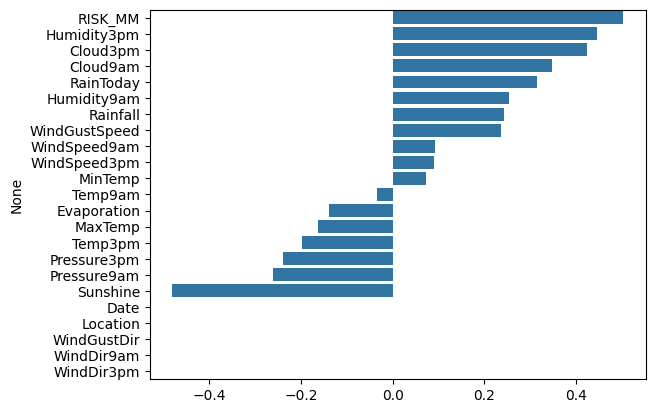

In [8]:
sns.barplot(
    x=correlation_with_target.drop('RainTomorrow').values,
    y=correlation_with_target.drop('RainTomorrow').index                #  .index gives us the row labels — which, in this case, are the names of the features
)

In [9]:
# Make a copy to avoid changing the original data unintentionally
data = dataset_imputed.copy()

# Remove 'RISK_MM' if it exists
if 'RISK_MM' in data.columns:
    data.drop('RISK_MM', axis=1, inplace=True)
    print("'RISK_MM' feature removed to prevent data leakage.")
else:
    print("'RISK_MM' already removed or not present.")

# Display the shape and the first few rows to confirm
print("\nUpdated dataset shape:", data.shape)
print("\nFirst 5 rows after removing 'RISK_MM':")
display(data.head())

'RISK_MM' feature removed to prevent data leakage.

Updated dataset shape: (121575, 23)

First 5 rows after removing 'RISK_MM':


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.0,0.0,20.4,25.8,0.0,6.0,12.4,0.0,31.0,0.0,...,84.0,71.0,1014.5,1013.6,3.0,1.0,23.3,24.7,0.0,0.0
1,0.0,0.0,20.9,26.7,0.2,8.0,10.3,0.0,31.0,0.0,...,79.0,77.0,1016.3,1015.5,2.0,5.0,25.0,25.1,0.0,0.0
2,0.0,0.0,22.3,26.3,0.0,3.2,2.0,0.0,35.0,0.0,...,87.0,90.0,1014.6,1014.3,7.0,7.0,24.7,23.8,0.0,1.0
3,0.0,0.0,21.6,22.2,1.2,2.8,0.0,0.0,41.0,0.0,...,92.0,95.0,1016.0,1015.3,8.0,8.0,22.1,21.2,1.0,1.0
4,0.0,0.0,20.4,23.5,2.6,2.2,2.9,0.0,52.0,0.0,...,86.0,86.0,1015.3,1013.7,7.0,7.0,21.8,21.6,1.0,0.0


--- STEP 3: OVERSAMPLE AND HANDLE OUTLIERS ON TRAINING DATA ---

In [10]:
# X = all features except 'RainTomorrow'
cleaned = data.copy()
# y = target variable
X = cleaned.drop('RainTomorrow', axis=1)
y = cleaned['RainTomorrow']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Check class balance
print("Original Class Distribution:\n", y.value_counts(normalize=True))
print("Training Set Class Distribution:\n", y_train.value_counts(normalize=True))
print("Testing Set Class Distribution:\n", y_test.value_counts(normalize=True))



Original Class Distribution:
 RainTomorrow
0.0    0.773901
1.0    0.226099
Name: proportion, dtype: float64
Training Set Class Distribution:
 RainTomorrow
0.0    0.773907
1.0    0.226093
Name: proportion, dtype: float64
Testing Set Class Distribution:
 RainTomorrow
0.0    0.773888
1.0    0.226112
Name: proportion, dtype: float64


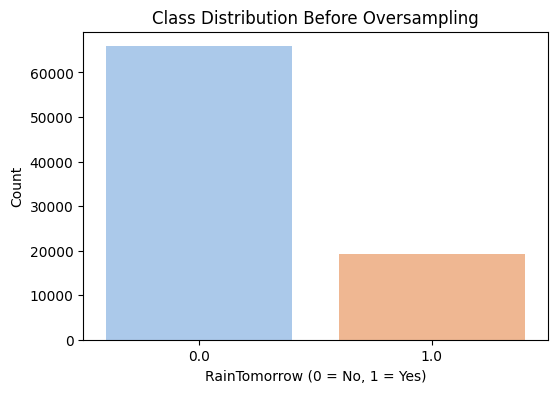

In [11]:
# Plot class distribution in original training data

# Make sure y_train is a DataFrame with column name
y_train_df = pd.DataFrame(y_train, columns=['RainTomorrow'])

plt.figure(figsize=(6, 4))
sns.countplot(data=y_train_df, x='RainTomorrow', hue='RainTomorrow', palette='pastel', legend=False)
plt.title("Class Distribution Before Oversampling")
plt.xlabel("RainTomorrow (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [12]:
from sklearn.utils import resample

# Assuming X_train and y_train are already defined
print("\n--- Step 3: Oversampling and Handling Outliers on Training Data ---")
df_train_combined = pd.concat([X_train, y_train], axis=1)
minority_class = df_train_combined[df_train_combined['RainTomorrow'] == 1]
majority_class = df_train_combined[df_train_combined['RainTomorrow'] == 0]

if not minority_class.empty:
    minority_oversampled = resample(minority_class,
                                    replace=True,
                                    n_samples=len(majority_class),
                                    random_state=42)
    df_train_resampled = pd.concat([majority_class, minority_oversampled])
else:
    print("⚠️ Minority class is empty. Oversampling not performed.")
    df_train_resampled = df_train_combined.copy()

print("Class distribution after oversampling:\n", df_train_resampled['RainTomorrow'].value_counts())


--- Step 3: Oversampling and Handling Outliers on Training Data ---
Class distribution after oversampling:
 RainTomorrow
0.0    65861
1.0    65861
Name: count, dtype: int64


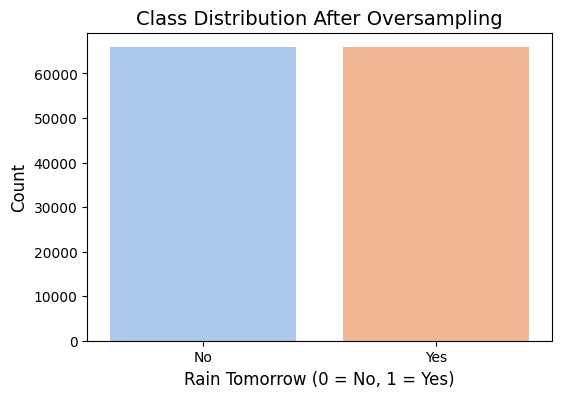

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_train_resampled, x='RainTomorrow', hue='RainTomorrow', palette='pastel', legend=False)

plt.title("Class Distribution After Oversampling", fontsize=14)
plt.xlabel("Rain Tomorrow (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks([0, 1], ['No', 'Yes'])

plt.show()

In [14]:
# Now, remove outliers from the BALANCED training data
Q1 = df_train_resampled.quantile(0.25)
Q3 = df_train_resampled.quantile(0.75)
IQR = Q3 - Q1
cleaned_resampled = df_train_resampled[~((df_train_resampled < (Q1 - 1.5 * IQR)) | (df_train_resampled > (Q3 + 1.5 * IQR))).any(axis=1)]

X_train_final = cleaned_resampled.drop('RainTomorrow', axis=1)
y_train_final = cleaned_resampled['RainTomorrow']

print("Final shape after outlier removal:", cleaned_resampled.shape)
print("Final class distribution:\n", y_train_final.value_counts(normalize=True))


Final shape after outlier removal: (102677, 23)
Final class distribution:
 RainTomorrow
0.0    0.561635
1.0    0.438365
Name: proportion, dtype: float64


In [15]:
# Combine features and target
final_cleaned_data = pd.concat([X_train_final, y_train_final], axis=1)

print("\n--- Final Cleaned Training Dataset (Preview) ---")
display(final_cleaned_data.head())  

# Save to CSV
final_cleaned_data.to_csv('Cleaned-dataset.csv', index=False)
print("\n✅ Final cleaned dataset saved as 'Cleaned-dataset.csv'")


--- Final Cleaned Training Dataset (Preview) ---


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
93140,0.0,0.0,12.7,30.8,0.0,7.513662,8.2,0.0,43.0,0.0,...,47.0,31.0,1016.2,1011.9,5.000000,8.000000,21.9,30.2,0.0,0.0
59537,0.0,0.0,10.1,30.4,0.0,4.000000,9.7,0.0,37.0,0.0,...,100.0,27.0,1022.8,1019.3,3.955124,2.754473,12.5,29.9,0.0,0.0
113544,0.0,0.0,-3.4,15.5,0.0,4.400000,10.2,0.0,50.0,0.0,...,54.0,16.0,1030.9,1026.7,1.000000,0.000000,6.6,14.5,0.0,0.0
81202,0.0,0.0,11.0,26.7,0.0,3.200000,7.2,0.0,56.0,0.0,...,44.0,24.0,1015.4,1012.4,5.000000,6.000000,20.2,26.2,0.0,0.0
82308,0.0,0.0,3.4,16.9,0.0,2.847155,9.5,0.0,20.0,0.0,...,60.0,39.0,1030.9,1027.8,0.000000,2.299481,10.8,15.9,0.0,0.0



✅ Final cleaned dataset saved as 'Cleaned-dataset.csv'


--- STEP 4: TRAIN AND COMPARE MULTIPLE MODELS ---


--- Step 4: Training and Comparing Models ---

--- Training Logistic Regression ---
--- Logistic Regression Evaluation on Test Data ---
ROC AUC Score: 0.8764

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.76      0.84     28226
         1.0       0.50      0.84      0.63      8247

    accuracy                           0.78     36473
   macro avg       0.72      0.80      0.73     36473
weighted avg       0.84      0.78      0.79     36473



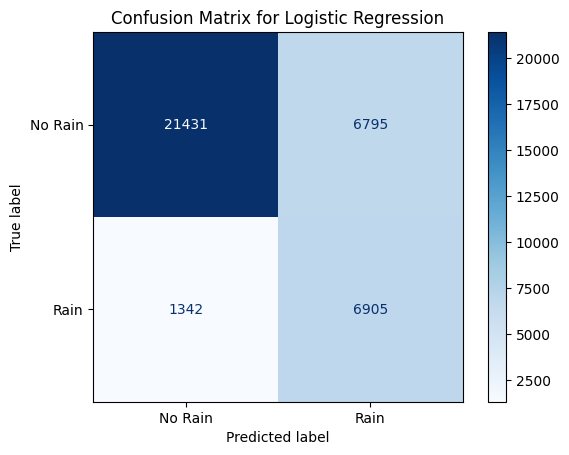


--- Training Random Forest ---
--- Random Forest Evaluation on Test Data ---
ROC AUC Score: 0.9151

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92     28226
         1.0       0.77      0.61      0.68      8247

    accuracy                           0.87     36473
   macro avg       0.83      0.78      0.80     36473
weighted avg       0.86      0.87      0.86     36473



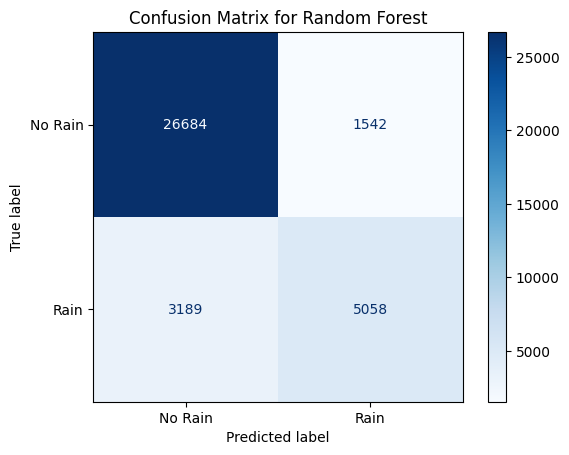


--- Training XGBoost ---
--- XGBoost Evaluation on Test Data ---
ROC AUC Score: 0.9143

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.87      0.90     28226
         1.0       0.64      0.79      0.71      8247

    accuracy                           0.85     36473
   macro avg       0.79      0.83      0.80     36473
weighted avg       0.87      0.85      0.86     36473



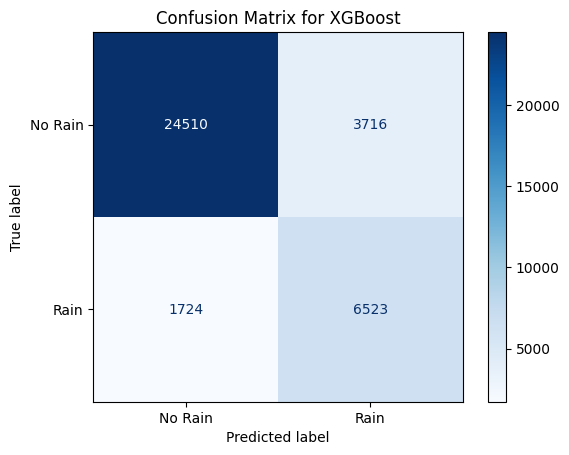

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve

print("\n--- Step 4: Training and Comparing Models ---")
models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42,  eval_metric='logloss')
}

results = {}
for model_name, model in models.items():
    print(f"\n--- Training {model_name} ---")
    model.fit(X_train_final, y_train_final)
    
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    results[model_name] = {
        'ROC_AUC': roc_auc_score(y_test, y_pred_proba),
        'Classification Report': classification_report(y_test, y_pred, output_dict=True)
    }

    print(f"--- {model_name} Evaluation on Test Data ---")
    print(f"ROC AUC Score: {results[model_name]['ROC_AUC']:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Rain', 'Rain'])
    disp.plot(cmap=plt.cm.Blues)
    disp.ax_.set_title(f"Confusion Matrix for {model_name}")
    plt.show()

 --- STEP 5: FINAL COMPARISON AND CONCLUSION ---


--- Step 5: Final Model Comparison Summary ---
                 Model   ROC_AUC  Precision_1  Recall_1  F1-Score_1
1        Random Forest  0.915142     0.766364  0.613314    0.681350
2              XGBoost  0.914272     0.637074  0.790954    0.705723
0  Logistic Regression  0.876426     0.504015  0.837274    0.629243


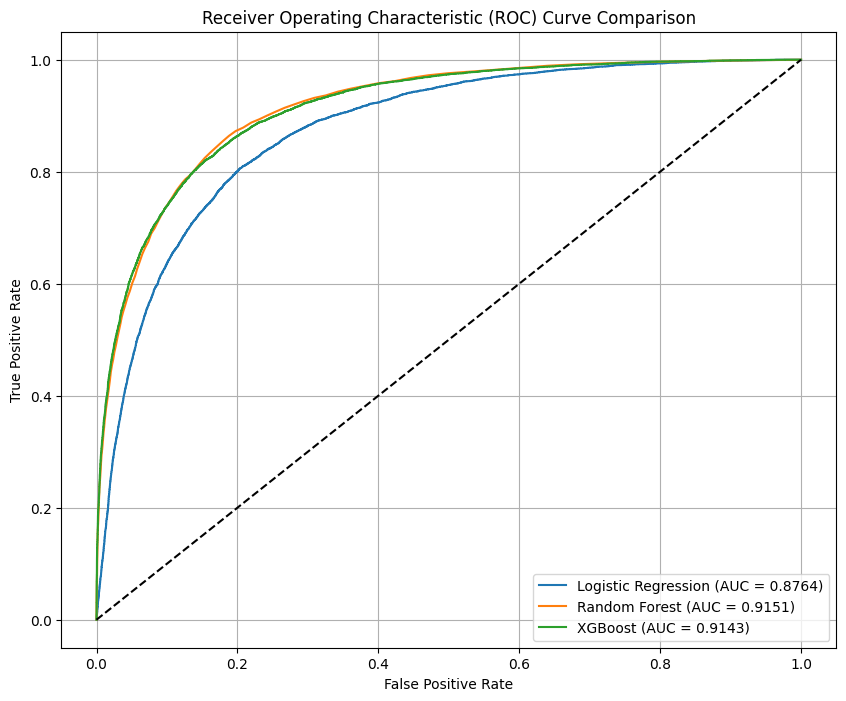


--- Final Conclusion ---
Based on ROC AUC and F1-Score for the minority class, the best performing model is likely: Random Forest


In [17]:
print("\n--- Step 5: Final Model Comparison Summary ---")

# Step 1: Collect rows in a list
performance_data = []

for model_name, metrics in results.items():
    precision_1 = metrics['Classification Report']['1.0']['precision']
    recall_1 = metrics['Classification Report']['1.0']['recall']
    f1_score_1 = metrics['Classification Report']['1.0']['f1-score']
    
    performance_data.append({
        'Model': model_name,
        'ROC_AUC': metrics['ROC_AUC'],
        'Precision_1': precision_1,
        'Recall_1': recall_1,
        'F1-Score_1': f1_score_1
    })

# Step 2: Convert to DataFrame
performance_df = pd.DataFrame(performance_data)
performance_df = performance_df.sort_values(by='ROC_AUC', ascending=False)
print(performance_df)

# Step 3: Plot ROC curves
plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Step 4: Conclusion
print("\n--- Final Conclusion ---")
best_model = performance_df.iloc[0]['Model']
print(f"Based on ROC AUC and F1-Score for the minority class, the best performing model is likely: {best_model}")
